In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
feature_path="D:\\MLforPTC\\02optimized&graph_descriptors\\graph_descriptor\\"
TC_path="D:\\MLforPTC\\02optimized&graph_descriptors\\TC\\"
train_data="MACCS_train.pkl"
test_data="MACCS_test.pkl"
TC_train="TC_train.pkl"
TC_test="TC_test.pkl"

In [28]:
train_df=pd.read_pickle(feature_path+train_data)
test_df=pd.read_pickle(feature_path+test_data)
TCtrain_df=pd.read_pickle(TC_path+TC_train)
TCtest_df=pd.read_pickle(TC_path+TC_test)

In [45]:
X_train=train_df
X_test=test_df
y_train=TCtrain_df["TC_log2"]
y_test=TCtest_df["TC_log2"]
for i in [X_train, X_test, y_train,y_test]:
    i.index = range(i.shape[0])
scaler.fit(X_train)
#scaler.fit(X_test)
X = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math
import numpy as np

In [33]:
#RF model
print ("***==========Construction of RF model==========***")
rfg = RandomForestRegressor(n_estimators =893, max_features='auto',random_state=0, max_depth =21,min_samples_split=3,min_samples_leaf=1)
rfg.fit(X,y_train.values.ravel())
res = rfg.predict(X_test)
print("Training set score: %f" % rfg.score(X,y_train))
print("Test set score: %f" % rfg.score(X_test,y_test))
mse=mean_squared_error(y_test,res)
rmse=math.sqrt(mse)
print('MSE:{}'.format(mse))
print('RMSE:{}'.format(rmse))

***==========Construction of RF model==========***
Training set score: 0.769716
Test set score: 0.741722
MSE:0.27719917607890854
RMSE:0.5264970807885914


In [50]:
#XGboost model
print ("***==========Construction of XGboost model==========***")
learning_rate=round(0.09313558530278768,2)
n_estimators=int(1168.622978422178)
max_depth = int(8.49567961074686)
min_child_weight=int(6.2776797279668095)
subsample=round(0.8349101504386344,2)
colsample_bytree=round(0.6201163081938823,2)
gamma=round(0.6764661015743683,2)
reg_alpha=round(0.2218312279628475,2)
reg_lambda=round(0.07762257097601799,2)
print (learning_rate,n_estimators,max_depth,min_child_weight,subsample,colsample_bytree,gamma,reg_alpha,reg_lambda)
model = xgb.XGBRegressor(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth,min_child_weight=min_child_weight\
                         ,seed=int(3),subsample=subsample,colsample_bytree=colsample_bytree,gamma=gamma,reg_alpha=reg_alpha,reg_lambda=reg_lambda)
model.fit(X,y_train.values.ravel())
res = model.predict(X_test)
print("Training set score: %f" % model.score(X,y_train))
print("Test set score: %f" % model.score(X_test,y_test))
mse=mean_squared_error(y_test,res)
rmse=math.sqrt(mse)
print('MSE:{}'.format(mse))
print('RMSE:{}'.format(rmse))

***==========Construction of XGboost model==========***
0.09 1168 8 6 0.83 0.62 0.68 0.22 0.08
Training set score: 0.739881
Test set score: 0.743336
MSE:0.27546672621393004
RMSE:0.5248492414150278


In [51]:
#MLP model
print ("***==========Construction of MLP model==========***")
randomseed = np.random.seed(int(0))
clf = MLPRegressor(solver='adam',alpha=1e-05,
                   hidden_layer_sizes=[174, 174, 174, 174, 174], max_iter=1000,
                   verbose=False, tol=0.0001,random_state=randomseed)
clf.fit(X,y_train.values.ravel())
print("Training set score: %f" % clf.score(X,y_train))
print("Test set score: %f" % clf.score(X_test,y_test))
res = clf.predict(X_test)
mse=mean_squared_error(y_test,res)
rmse=math.sqrt(mse)
print('MSE:{}'.format(mse))
print('RMSE:{}'.format(rmse))

***==========Construction of MLP model==========***
Training set score: 0.819813
Test set score: 0.707776
MSE:0.31363119413631585
RMSE:0.5600278512148443


In [52]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

***==========Plots of RF model prediction results==========***


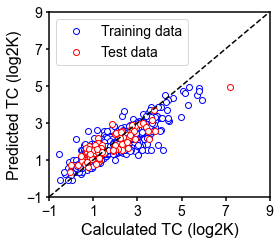

In [53]:
print ("***==========Plots of RF model prediction results==========***")
RF_train = rfg.predict(X)
RF_test = rfg.predict(X_test)
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,RF_train,color='b',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.plot(y_test,RF_test,color='r',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.legend(labels=["Training data","Test data"],loc="best",fontsize=14)  
sub_map= str.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉')
title='Calculated TC (log2K)'
title1='Predicted TC (log2K)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((-1, 9))
plt.ylim((-1, 9))
plt.plot([-1,9],[-1,9], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(-1,10,2)
my_y_ticks = np.arange(-1,10,2)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
#plt.savefig('D:\\huangxiang\\毕业设计\\课题1工作\\课题1\\论文作图\\FIGURE\\模型\\result.pdf',transparent=True,bbox_inches = 'tight')
#plt.savefig('D:\\huangxiang\\毕业设计\\课题1工作\\课题1\\论文作图\\FIGURE\\模型\\result.svg',transparent=True,bbox_inches = 'tight')
#plt.savefig('D:\\huangxiang\\毕业设计\\课题1工作\\课题1\\论文作图\\FIGURE\\模型\\result.png', dpi=300,transparent=True,bbox_inches = 'tight')
plt.tight_layout()
# show
plt.show()

***==========Plots of XGBoost model prediction results==========***


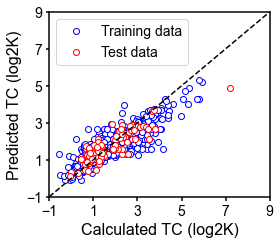

In [54]:
print ("***==========Plots of XGBoost model prediction results==========***")
XGBoost_train = model.predict(X)
XGBoost_test = model.predict(X_test)
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,XGBoost_train,color='b',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.plot(y_test,XGBoost_test,color='r',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.legend(labels=["Training data","Test data"],loc="best",fontsize=14)  
sub_map= str.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉')
title='Calculated TC (log2K)'
title1='Predicted TC (log2K)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((-1, 9))
plt.ylim((-1, 9))
plt.plot([-1,9],[-1,9], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(-1,10,2)
my_y_ticks = np.arange(-1,10,2)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
#plt.savefig('D:\\huangxiang\\毕业设计\\课题1工作\\课题1\\论文作图\\FIGURE\\模型\\result.pdf',transparent=True,bbox_inches = 'tight')
#plt.savefig('D:\\huangxiang\\毕业设计\\课题1工作\\课题1\\论文作图\\FIGURE\\模型\\result.svg',transparent=True,bbox_inches = 'tight')
#plt.savefig('D:\\huangxiang\\毕业设计\\课题1工作\\课题1\\论文作图\\FIGURE\\模型\\result.png', dpi=300,transparent=True,bbox_inches = 'tight')
plt.tight_layout()
# show
plt.show()

***==========Plots of MLP model prediction results==========***


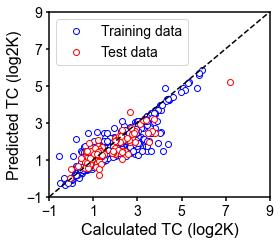

In [55]:
print ("***==========Plots of MLP model prediction results==========***")
MLP_train = clf.predict(X)
MLP_test = clf.predict(X_test)
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,MLP_train,color='b',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.plot(y_test,MLP_test,color='r',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.legend(labels=["Training data","Test data"],loc="best",fontsize=14)  
sub_map= str.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉')
title='Calculated TC (log2K)'
title1='Predicted TC (log2K)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((-1, 9))
plt.ylim((-1, 9))
plt.plot([-1,9],[-1,9], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(-1,10,2)
my_y_ticks = np.arange(-1,10,2)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
#plt.savefig('D:\\huangxiang\\毕业设计\\课题1工作\\课题1\\论文作图\\FIGURE\\模型\\result.pdf',transparent=True,bbox_inches = 'tight')
#plt.savefig('D:\\huangxiang\\毕业设计\\课题1工作\\课题1\\论文作图\\FIGURE\\模型\\result.svg',transparent=True,bbox_inches = 'tight')
#plt.savefig('D:\\huangxiang\\毕业设计\\课题1工作\\课题1\\论文作图\\FIGURE\\模型\\result.png', dpi=300,transparent=True,bbox_inches = 'tight')
plt.tight_layout()
# show
plt.show()